<a href="https://colab.research.google.com/github/ihawryluk/importations/blob/main/RelaxedBernoulli_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install numpyro

In [39]:
import numpyro
import jax
numpyro.set_host_device_count(4)  # 4 cores
from jax import vmap
import jax.numpy as jnp
import jax.random as random

from numpyro.infer import Predictive
import numpyro.distributions as dist
import arviz as az
from numpyro.infer import MCMC, NUTS
from numpyro.contrib.control_flow import scan

from scipy.stats import gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from google.colab import drive
drive.mount('/content/drive')

import arviz as az

Mounted at /content/drive


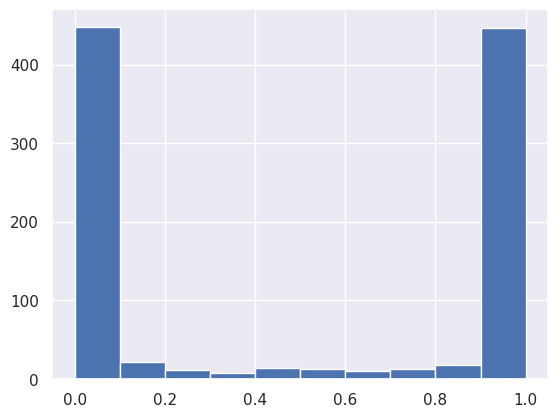

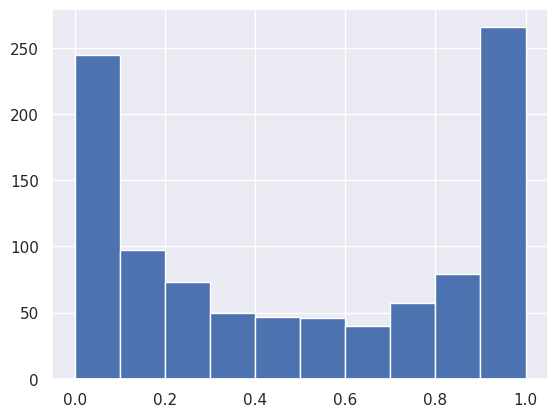

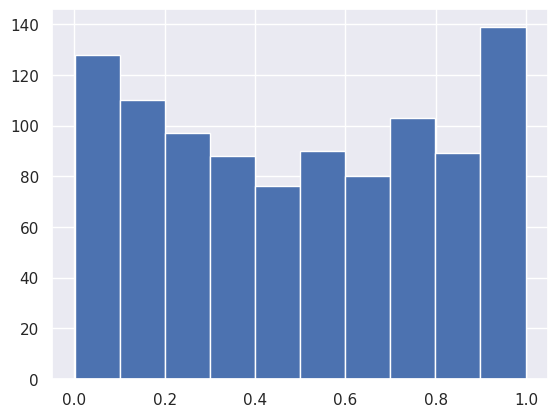

In [31]:
plt.hist(dist.RelaxedBernoulli(0.1, probs=0.5).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(0.5, probs=0.5).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(0.9, probs=0.5).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

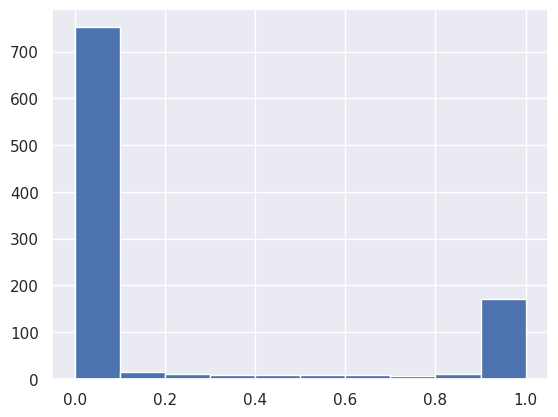

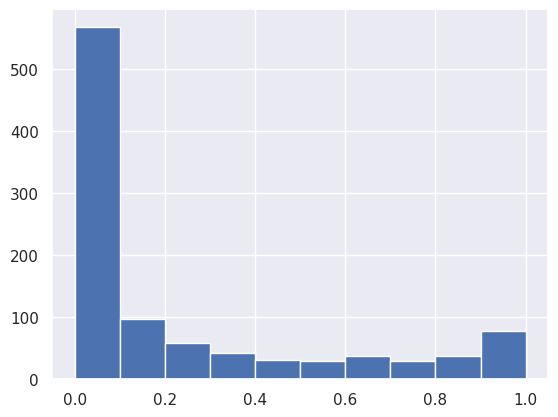

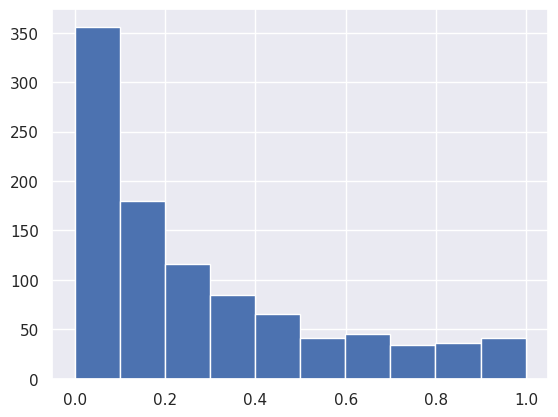

In [32]:
plt.hist(dist.RelaxedBernoulli(0.1, probs=0.2).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(0.5, probs=0.2).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(0.9, probs=0.2).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

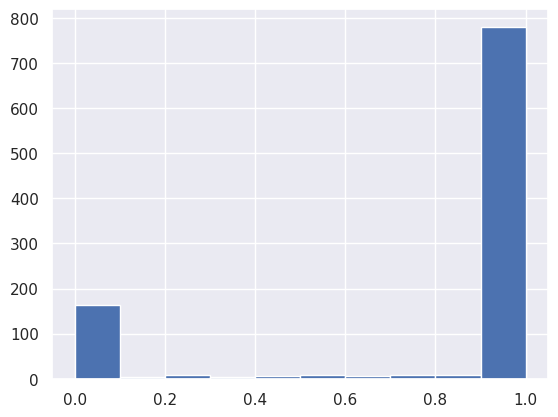

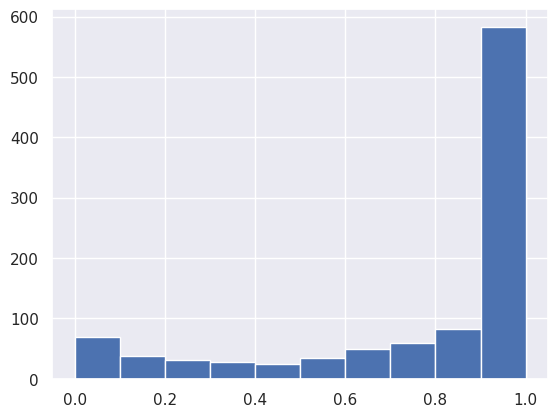

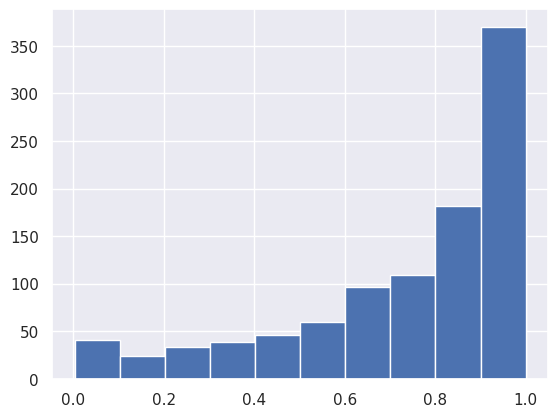

In [33]:
plt.hist(dist.RelaxedBernoulli(0.1, probs=0.8).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(0.5, probs=0.8).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(0.9, probs=0.8).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

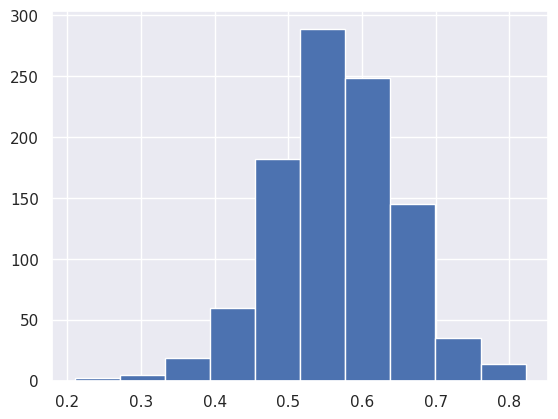

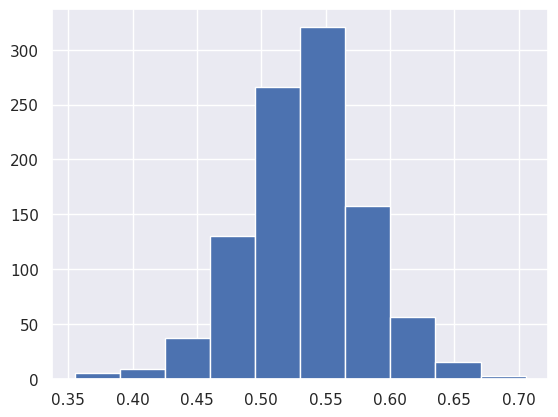

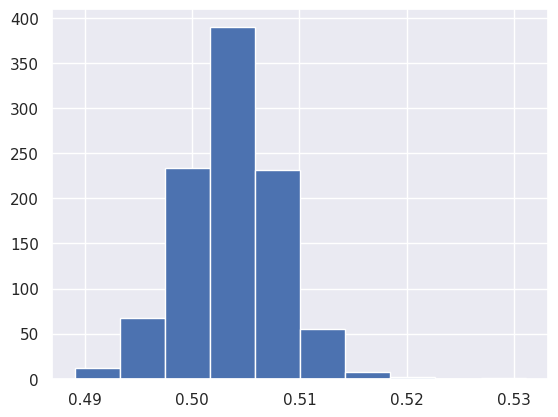

In [34]:
plt.hist(dist.RelaxedBernoulli(5, probs=0.8).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(10, probs=0.8).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(100, probs=0.8).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

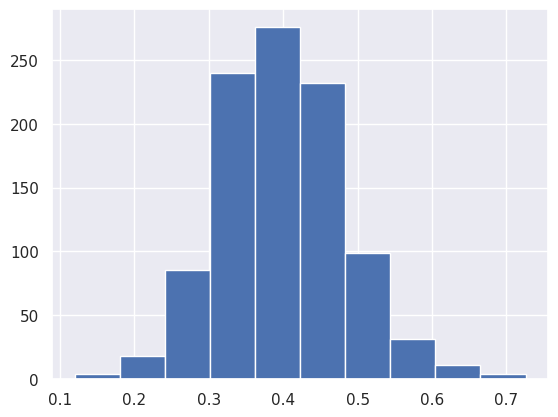

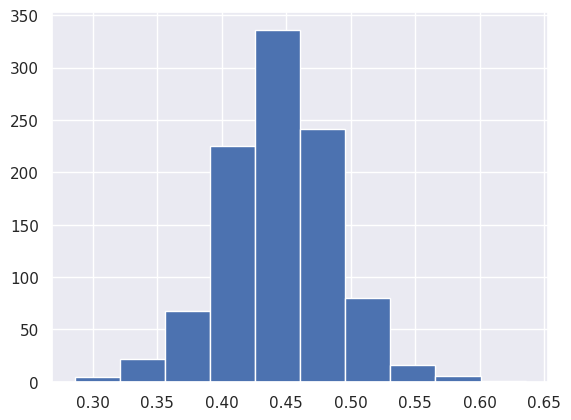

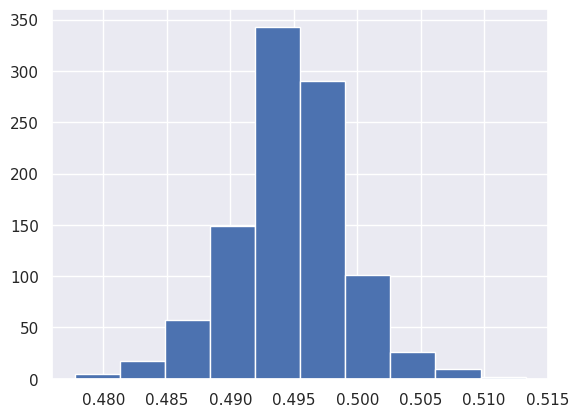

In [35]:
plt.hist(dist.RelaxedBernoulli(5, probs=0.1).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(10, probs=0.1).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

plt.hist(dist.RelaxedBernoulli(100, probs=0.1).sample(random.PRNGKey(np.random.randint(10000)), (1000,)))
plt.show()

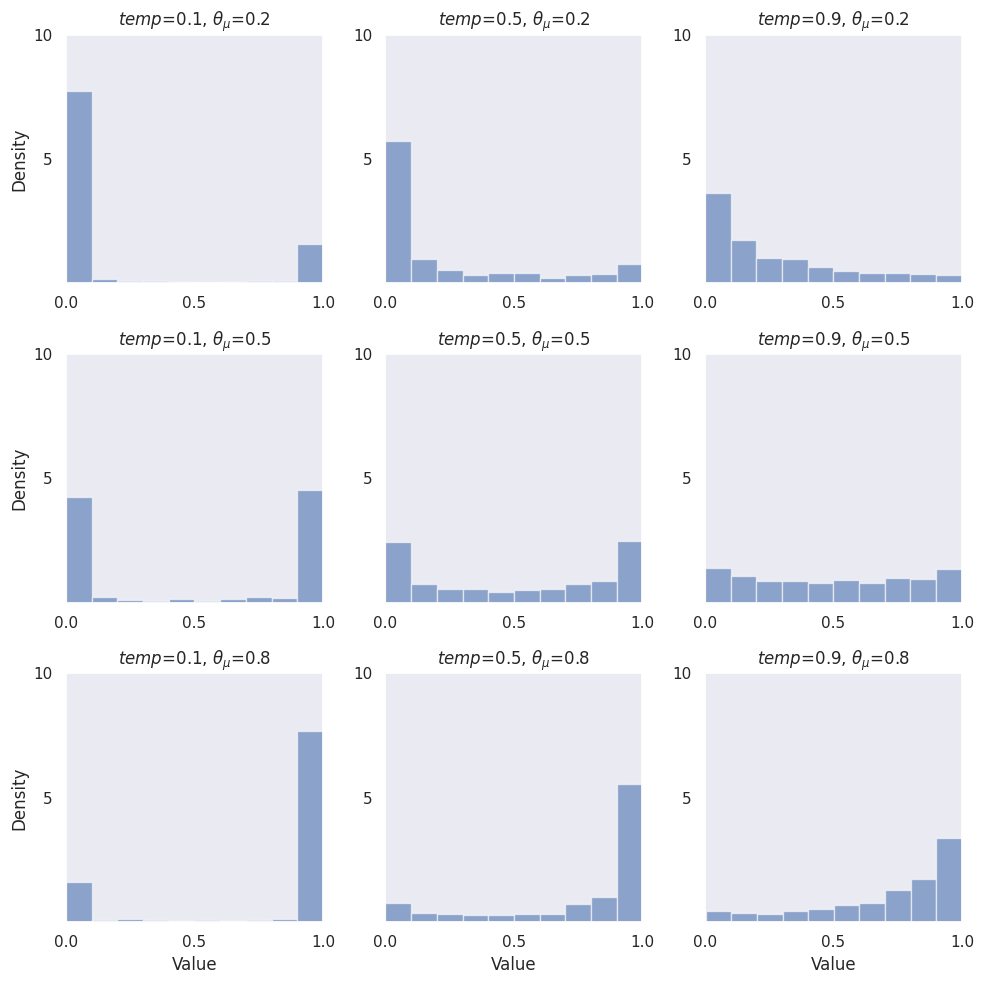

In [40]:

# Parameters for the RelaxedBernoulli distribution
temperatures = [0.1, 0.5, 0.9]
probabilities = [0.2, 0.5, 0.8]

# Create the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop over the parameters and create the histograms
for i, temp in enumerate(temperatures):
    for j, prob in enumerate(probabilities):
        key = random.PRNGKey(np.random.randint(10000))
        samples = dist.RelaxedBernoulli(temp, probs=prob).sample(key, (1000,))

        ax = axes[j,i]
        ax.hist(samples, density=True, alpha=0.6, color='b')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 10)
        ax.set_title(f'$temp$={temp}, $\\theta_\mu$={prob}')

        # # Remove y-axis ticks
        # ax.set_yticks([])

        # Set y-label 'Density' only on the left-hand side column
        if i == 0:
            ax.set_ylabel('Density')

        # Set x-label 'Value' only on the bottom row
        if j == 2:
            ax.set_xlabel('Value')

        # Set x-axis ticks to 0, 0.5, 1.0
        ax.set_xticks([0, 0.5, 1.0])
        ax.set_yticks([5,10])

        ax.grid(False)

plt.tight_layout()
# plt.show()

savepath = '/content/drive/My Drive/Colab Notebooks/importations/Figures/'
namefile = 'example_relaxed_bernoulli'
plt.savefig(savepath + namefile + '.pdf', format = 'pdf', bbox_inches = 'tight')
